In [28]:
import numpy as np
import pandas as pd
import json
from epilepsypcm.utils.outcome_params import node_location

all_positive_patients = pd.read_csv("df_final.csv", sep = ',').reset_index(drop = True)

In [2]:
print(all_positive_patients["outcome"].value_counts())
all_positive_patients.head()


0.0    259
1.0     56
Name: outcome, dtype: int64


,Unnamed: 0,Channels,outcome,IZ,EP,SigResp,SigStim,N1RespAvg,N1RespSDV,N2RespAvg,...,N1StimSDV,N2StimAvg,N2StimSDV,P2StimAvg,P2StimSDV,patient,InDegree,OutDegree,EV,Closeness
0,0,LA1_LA2,1.0,0.0,0.0,0.000000,0.064516,0.000000,0.000000,0.000000,...,2.011706,3.724259,3.460362,2.796966,3.000218,PY21N008,0.000000,0.071429,4.993936e-14,0.000000
1,1,LA9_LA10,0.0,1.0,0.0,0.000000,0.193548,1.808045,1.676081,2.493333,...,9.957544,5.060794,6.246739,4.478926,6.889325,PY21N008,0.000000,0.214286,4.993936e-14,0.000000
2,2,LAH1_LAH2,1.0,1.0,0.0,0.064516,0.193548,7.116911,19.154270,4.252294,...,14.745868,3.809967,3.367630,1.821021,1.867067,PY21N008,0.071429,0.214286,7.960633e-04,0.174603
3,3,LAH8_LAH9,0.0,0.0,0.0,0.290323,0.096774,4.306443,3.856300,4.059026,...,2.173960,1.695722,1.598789,1.574253,2.044144,PY21N008,0.321429,0.107143,1.590588e-01,0.480159
4,4,LPH1_LPH2,0.0,1.0,0.0,0.096774,0.258065,5.792531,15.863221,3.143365,...,7.764073,3.585250,3.693649,3.242192,3.639533,PY21N008,0.107143,0.285714,4.743272e-03,0.218807


In [3]:
from epilepsypcm.utils.make_df import make_df, get_df_list, concat_dfs
from epilepsypcm.models.base_models import *
from sklearn.metrics import auc

# Effect of network ON node - One node was stimuated by a bunch of nodes, here is its aggregate response

In [5]:
X_list = ["Channels", "SigResp", "N1RespAvg", "N1RespSDV", "N2RespAvg", "N2RespSDV", "P2RespAvg", "P2RespSDV"]

[21:33:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/shrey2/opt/anaconda3/envs/pcm/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


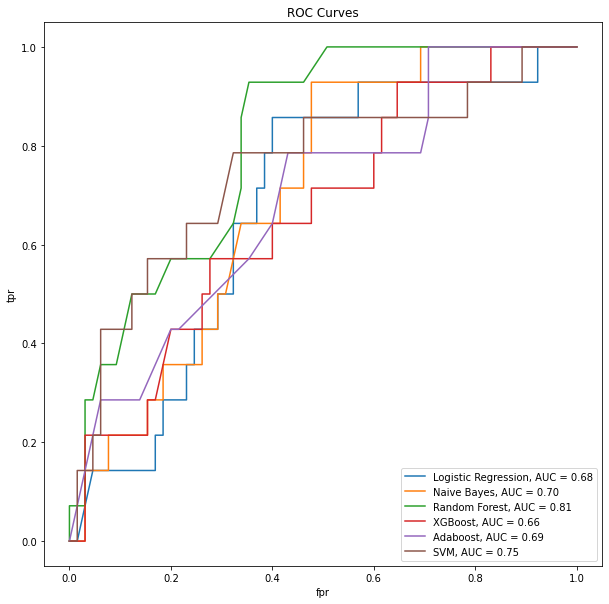

In [6]:
# resp channels

plot_roc = False
plot_pr = False

plt.figure(figsize = (10,10))
plt.title("ROC Curves")
plt.xlabel("fpr")
plt.ylabel("tpr")

#logistic regression
lr, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = logistic_regression(all_positive_patients, X_list, plot_roc, plot_pr)
plt.plot(fpr, tpr, label = "Logistic Regression, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#naive bayes
gnb, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = naive_bayes(all_positive_patients, X_list, plot_roc, plot_pr)
plt.plot(fpr, tpr, label = "Naive Bayes, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#random forest
max_depth = 20
rf, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr)
plt.plot(fpr, tpr, label = "Random Forest, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#xgboost
learning_rate = 0.5
max_depth = 10
n_estimators = 10
xgb, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = xgboost(all_positive_patients, X_list, learning_rate, max_depth, n_estimators, plot_roc, plot_pr)
plt.plot(fpr, tpr, label = "XGBoost, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#adaboost
n_estimators = 10
ada, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = adaboost(all_positive_patients, X_list, n_estimators, plot_roc, plot_pr)
plt.plot(fpr, tpr, label = "Adaboost, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#svm
C = 0.7
epsilon = 0.2
sv, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = svm(all_positive_patients, X_list, C, epsilon, plot_roc, plot_pr)
plt.plot(fpr, tpr, label = "SVM, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')



[21:33:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/shrey2/opt/anaconda3/envs/pcm/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


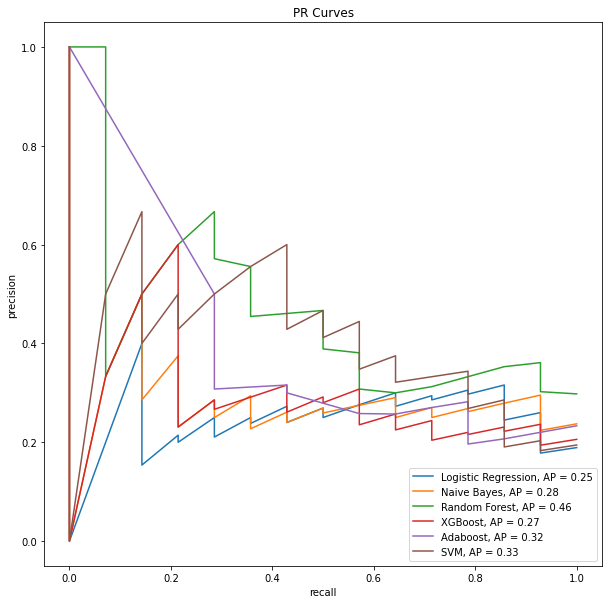

In [7]:
plot_roc = False
plot_pr = False

plt.figure(figsize = (10,10))
plt.title("PR Curves")
plt.xlabel("recall")
plt.ylabel("precision")

#logistic regression
lr, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = logistic_regression(all_positive_patients, X_list, plot_roc, plot_pr)
plt.plot(recall, precision, label='Logistic Regression, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#naive bayes
gnb, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = naive_bayes(all_positive_patients, X_list, plot_roc, plot_pr)
plt.plot(recall, precision, label='Naive Bayes, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#random forest
max_depth = 20
rf, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr)
plt.plot(recall, precision, label='Random Forest, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#xgboost
learning_rate = 0.5
max_depth = 10
n_estimators = 10
xgb, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = xgboost(all_positive_patients, X_list, learning_rate, max_depth, n_estimators, plot_roc, plot_pr)
plt.plot(recall, precision, label='XGBoost, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#adaboost
n_estimators = 10
ada, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = adaboost(all_positive_patients, X_list, n_estimators, plot_roc, plot_pr)
plt.plot(recall, precision, label='Adaboost, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#svm
C = 0.7
epsilon = 0.2
sv, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = svm(all_positive_patients, X_list, C, epsilon, plot_roc, plot_pr)
plt.plot(recall, precision, label='SVM, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

# Effect of node ON network - One node stimulated a lot of different nodes, here are their aggregate responses 

In [8]:
X_list = ["Channels","SigStim", "N1StimAvg", "N1StimSDV", "N2StimAvg", "N2StimSDV", "P2StimAvg", "P2StimSDV"]


[21:33:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/shrey2/opt/anaconda3/envs/pcm/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


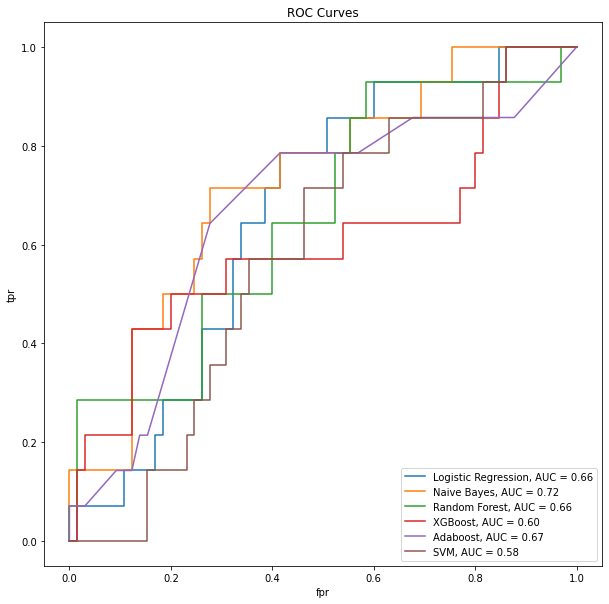

In [9]:
# stim channels

plot_roc = False
plot_pr = False

plt.figure(figsize = (10,10))
plt.title("ROC Curves")
plt.xlabel("fpr")
plt.ylabel("tpr")

#logistic regression
lr, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = logistic_regression(all_positive_patients, X_list, plot_roc, plot_pr)
plt.plot(fpr, tpr, label = "Logistic Regression, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#naive bayes
gnb, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = naive_bayes(all_positive_patients, X_list, plot_roc, plot_pr)
plt.plot(fpr, tpr, label = "Naive Bayes, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#random forest
max_depth = 10
rf, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr)
plt.plot(fpr, tpr, label = "Random Forest, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#xgboost
learning_rate = 0.5
max_depth = 10
n_estimators = 10
xgb, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = xgboost(all_positive_patients, X_list, learning_rate, max_depth, n_estimators, plot_roc, plot_pr)
plt.plot(fpr, tpr, label = "XGBoost, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#adaboost
n_estimators = 10
ada, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = adaboost(all_positive_patients, X_list, n_estimators, plot_roc, plot_pr)
plt.plot(fpr, tpr, label = "Adaboost, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#svm
C = 0.7
epsilon = 0.2
sv, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = svm(all_positive_patients, X_list, C, epsilon, plot_roc, plot_pr)
plt.plot(fpr, tpr, label = "SVM, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')



[21:33:57] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/shrey2/opt/anaconda3/envs/pcm/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


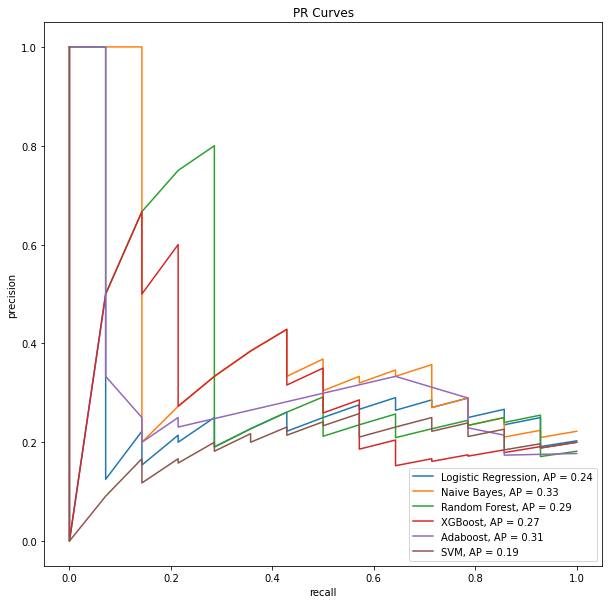

In [10]:
plot_roc = False
plot_pr = False

plt.figure(figsize = (10,10))
plt.title("PR Curves")
plt.xlabel("recall")
plt.ylabel("precision")

#logistic regression
lr, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = logistic_regression(all_positive_patients, X_list, plot_roc, plot_pr)
plt.plot(recall, precision, label='Logistic Regression, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#naive bayes
gnb, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = naive_bayes(all_positive_patients, X_list, plot_roc, plot_pr)
plt.plot(recall, precision, label='Naive Bayes, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#random forest
max_depth = 10
rf, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr)
plt.plot(recall, precision, label='Random Forest, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#xgboost
learning_rate = 0.5
max_depth = 10
n_estimators = 10
xgb, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = xgboost(all_positive_patients, X_list, learning_rate, max_depth, n_estimators, plot_roc, plot_pr)
plt.plot(recall, precision, label='XGBoost, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#adaboost
n_estimators = 10
ada, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = adaboost(all_positive_patients, X_list, n_estimators, plot_roc, plot_pr)
plt.plot(recall, precision, label='Adaboost, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#svm
C = 0.7
epsilon = 0.2
sv, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = svm(all_positive_patients, X_list, C, epsilon, plot_roc, plot_pr)
plt.plot(recall, precision, label='SVM, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

# Effect of network ON node AND effect of node ON network

In [11]:
X_list = ["Channels","SigResp", "N1RespAvg", "N1RespSDV", "N2RespAvg", "N2RespSDV", "P2RespAvg", "P2RespSDV", 
          "SigStim", "N1StimAvg", "N1StimSDV", "N2StimAvg", "N2StimSDV", "P2StimAvg", "P2StimSDV"]

[21:34:03] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/shrey2/opt/anaconda3/envs/pcm/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/shrey2/opt/anaconda3/envs/pcm/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, U

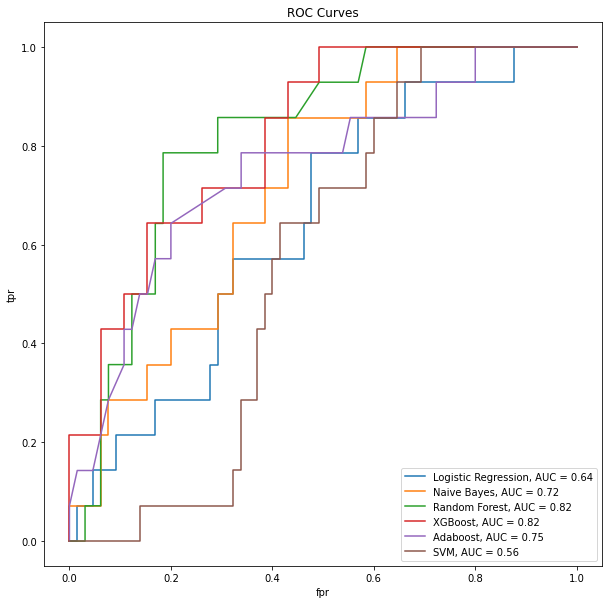

In [12]:
# stim + resp channels

plot_roc = False
plot_pr = False

plt.figure(figsize = (10,10))
plt.title("ROC Curves")
plt.xlabel("fpr")
plt.ylabel("tpr")

#logistic regression
lr, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = logistic_regression(all_positive_patients, X_list, plot_roc, plot_pr)
plt.plot(fpr, tpr, label = "Logistic Regression, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#naive bayes
gnb, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = naive_bayes(all_positive_patients, X_list, plot_roc, plot_pr)
plt.plot(fpr, tpr, label = "Naive Bayes, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#random forest
max_depth = 10
rf, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr)
plt.plot(fpr, tpr, label = "Random Forest, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#xgboost
learning_rate = 0.5
max_depth = 10
n_estimators = 10
xgb, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = xgboost(all_positive_patients, X_list, learning_rate, max_depth, n_estimators, plot_roc, plot_pr)
plt.plot(fpr, tpr, label = "XGBoost, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#adaboost
n_estimators = 10
ada, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = adaboost(all_positive_patients, X_list, n_estimators, plot_roc, plot_pr)
plt.plot(fpr, tpr, label = "Adaboost, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#svm
C = 0.7
epsilon = 0.2
sv, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = svm(all_positive_patients, X_list, C, epsilon, plot_roc, plot_pr)
plt.plot(fpr, tpr, label = "SVM, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')



[21:34:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/shrey2/opt/anaconda3/envs/pcm/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/shrey2/opt/anaconda3/envs/pcm/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, U

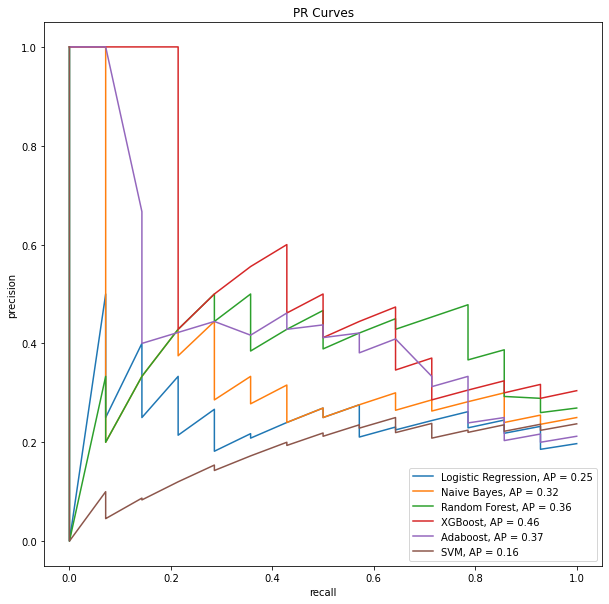

In [13]:
plot_roc = False
plot_pr = False

plt.figure(figsize = (10,10))
plt.title("PR Curves")
plt.xlabel("recall")
plt.ylabel("precision")

#logistic regression
lr, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = logistic_regression(all_positive_patients, X_list, plot_roc, plot_pr)
plt.plot(recall, precision, label='Logistic Regression, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#naive bayes
gnb, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = naive_bayes(all_positive_patients, X_list, plot_roc, plot_pr)
plt.plot(recall, precision, label='Naive Bayes, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#random forest
max_depth = 10
rf, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr)
plt.plot(recall, precision, label='Random Forest, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#xgboost
learning_rate = 0.5
max_depth = 10
n_estimators = 10
xgb, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = xgboost(all_positive_patients, X_list, learning_rate, max_depth, n_estimators, plot_roc, plot_pr)
plt.plot(recall, precision, label='XGBoost, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#adaboost
n_estimators = 10
ada, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = adaboost(all_positive_patients, X_list, n_estimators, plot_roc, plot_pr)
plt.plot(recall, precision, label='Adaboost, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#svm
C = 0.7
epsilon = 0.2
sv, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = svm(all_positive_patients, X_list, C, epsilon, plot_roc, plot_pr)
plt.plot(recall, precision, label='SVM, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

# Stats for model with stimulation AND response columns

In [14]:
from sklearn.metrics import confusion_matrix

In [15]:
#Logistic regression

lr, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = logistic_regression(all_positive_patients, X_list, plot_roc, plot_pr)
optimal_thresh = roc_thresholds[np.argmax(tpr - fpr)]
y_rounded = np.where(y_pred > optimal_thresh, 1, 0)

tn, fp, fn, tp = confusion_matrix(y_test, y_rounded).ravel()

print("Accuracy: ", (tp + tn)/(tp + fp + tn + fn))
print("Sensitivity: ", tp / (tp + fn))
print("Specificity: ", tn / (tn + fp))

Accuracy:  0.5569620253164557
Sensitivity:  0.7142857142857143
Specificity:  0.5230769230769231


/Users/shrey2/opt/anaconda3/envs/pcm/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
#Naive Bayes

gnb, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = naive_bayes(all_positive_patients, X_list, plot_roc, plot_pr)
optimal_thresh = roc_thresholds[np.argmax(tpr - fpr)]
y_rounded = np.where(y_pred > optimal_thresh, 1, 0)

tn, fp, fn, tp = confusion_matrix(y_test, y_rounded).ravel()

print("Accuracy: ", (tp + tn)/(tp + fp + tn + fn))
print("Sensitivity: ", tp / (tp + fn))
print("Specificity: ", tn / (tn + fp))

Accuracy:  0.6075949367088608
Sensitivity:  0.7857142857142857
Specificity:  0.5692307692307692


In [17]:
#Random Forest

max_depth = 10
rf, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr)
optimal_thresh = roc_thresholds[np.argmax(tpr - fpr)]
y_rounded = np.where(y_pred > optimal_thresh, 1, 0)

tn, fp, fn, tp = confusion_matrix(y_test, y_rounded).ravel()

print("Accuracy: ", (tp + tn)/(tp + fp + tn + fn))
print("Sensitivity: ", tp / (tp + fn))
print("Specificity: ", tn / (tn + fp))

Accuracy:  0.7848101265822784
Sensitivity:  0.6428571428571429
Specificity:  0.8153846153846154


In [18]:
#XGBoost

learning_rate = 0.5
max_depth = 10
n_estimators = 10
xgb, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = xgboost(all_positive_patients, X_list, learning_rate, max_depth, n_estimators, plot_roc, plot_pr)
y_rounded = np.where(y_pred > optimal_thresh, 1, 0)

tn, fp, fn, tp = confusion_matrix(y_test, y_rounded).ravel()

print("Accuracy: ", (tp + tn)/(tp + fp + tn + fn))
print("Sensitivity: ", tp / (tp + fn))
print("Specificity: ", tn / (tn + fp))



[21:34:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy:  0.8227848101265823
Sensitivity:  0.42857142857142855
Specificity:  0.9076923076923077


/Users/shrey2/opt/anaconda3/envs/pcm/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [19]:
#Adaboost

n_estimators = 10
ada, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = adaboost(all_positive_patients, X_list, n_estimators, plot_roc, plot_pr)
y_rounded = np.where(y_pred > optimal_thresh, 1, 0)

tn, fp, fn, tp = confusion_matrix(y_test, y_rounded).ravel()

print("Accuracy: ", (tp + tn)/(tp + fp + tn + fn))
print("Sensitivity: ", tp / (tp + fn))
print("Specificity: ", tn / (tn + fp))



Accuracy:  0.4050632911392405
Sensitivity:  0.8571428571428571
Specificity:  0.3076923076923077


In [20]:
#SVM

C = 0.7
epsilon = 0.2
sv, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = svm(all_positive_patients, X_list, C, epsilon, plot_roc, plot_pr)
y_rounded = np.where(y_pred > optimal_thresh, 1, 0)

tn, fp, fn, tp = confusion_matrix(y_test, y_rounded).ravel()

print("Accuracy: ", (tp + tn)/(tp + fp + tn + fn))
print("Sensitivity: ", tp / (tp + fn))
print("Specificity: ", tn / (tn + fp))


Accuracy:  0.7215189873417721
Sensitivity:  0.07142857142857142
Specificity:  0.8615384615384616


# Boxplots for models with stimulation AND response Columns

In [21]:
import seaborn as sns

X_list = ["Channels", "SigResp", "N1RespAvg", "N1RespSDV", "N2RespAvg", "N2RespSDV", "P2RespAvg", "P2RespSDV", 
          "SigStim", "N1StimAvg", "N1StimSDV", "N2StimAvg", "N2StimSDV", "P2StimAvg", "P2StimSDV",
         "InDegree", "OutDegree", "EV", "Closeness"]

## Logistic Regression

Optimal roc threshold:  0.11884600885681788
Accuracy:  0.4810126582278481
Sensitivity:  0.8571428571428571
Specificity:  0.4


Positive labels
Right amygdala
left amygdala
right posterior hippocampus
Left fronto-temporal grid
Right medial tumor inferior
left anterior hippocampus
Right amygdala depth
Left fronto-temporal grid
Left fronto-temporal grid
left amygdala
Left orbitofrontal depth
Right anterior hippocampus
Right anterior temporal inferior
Basal temporal anterior


Negative labels
Left posterior nodule depth
Left amygdala
left posterior hippocampus
right posterior hippocampus
Left nodule E
Left lateral lesion 1
which patient?
Right piriform
Left anterior cingulate
Left posterior cortical dysplasia
Left lateral lesion 2
Left posterior cortical dysplasia
Basal temporal posterior-temporal
left posterior hippocampus
left anterior cortical dysplasia
Right orbitofrontal
Right anterior insular depth
Left orbitofrontal
Left posterior cortical dysplasia
left posterior hippocampus
Right 

/Users/shrey2/opt/anaconda3/envs/pcm/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:title={'center':'Logistic Regression boxplots'}, xlabel='non_SOZ                                                                               SOZ', ylabel='P(SOZ)'>

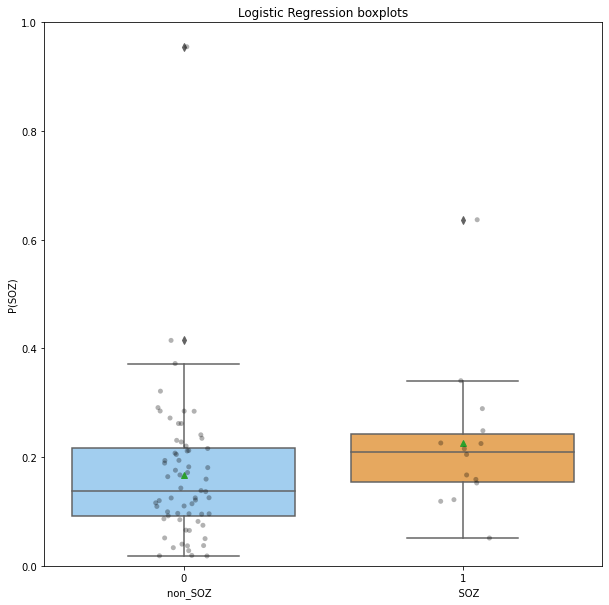

In [22]:
#Logistic regression

lr, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = logistic_regression(all_positive_patients, X_list, plot_roc, plot_pr)

# Printing Metrics
optimal_thresh = roc_thresholds[np.argmax(tpr - fpr)]
print("Optimal roc threshold: ", optimal_thresh)
y_rounded = np.where(y_pred > optimal_thresh, 1, 0)

tn, fp, fn, tp = confusion_matrix(y_test, y_rounded).ravel()

print("Accuracy: ", (tp + tn)/(tp + fp + tn + fn))
print("Sensitivity: ", tp / (tp + fn))
print("Specificity: ", tn / (tn + fp))


# Plotting boxplot
non_epilepsy = []
channels_non = []
epilepsy_normal = []
channels_normal = []

i = 0
while i < len(y_test):
    if list(y_test)[i] == 1.0:
        epilepsy_normal.append(y_pred[i])
        channels_normal.append(test_channels[i])
    elif list(y_test)[i] == 0.0:
        non_epilepsy.append(y_pred[i])
        channels_non.append(test_channels[i])
    i += 1

channels_normal = [x for _,x in sorted(zip(epilepsy_normal, channels_normal), reverse = True)]

pos_labels = []
for channel in channels_normal:
    channel = ''.join(i for i in channel if not i.isdigit()) #dropping digits from channel name
    channel_split = channel.split("_")
    for key in node_location.keys():
        if (channel_split[0] == key) | (channel_split[1] == key):
            pos_labels.append(node_location[key])

neg_labels = []
for channel in channels_non:
    channel = ''.join(i for i in channel if not i.isdigit()) #dropping digits from channel name
    channel_split = channel.split("_")
    for key in node_location.keys():
        if (channel_split[0] == key) | (channel_split[1] == key):
            neg_labels.append(node_location[key])

print("\n")
print("Positive labels")            
print(*pos_labels, sep = "\n")

print("\n")
print("Negative labels")
print(*neg_labels, sep = "\n")

    
plt.figure(figsize = (10, 10))
plt.title("Logistic Regression boxplots")
plt.xlabel("non_SOZ                                                                               SOZ")
plt.ylabel("P(SOZ)")
plt.ylim([0,1])

sns.boxplot(
    data=[non_epilepsy, epilepsy_normal],
    palette=[sns.xkcd_rgb["light blue"], sns.xkcd_rgb["light orange"]],
    showmeans=True,
)

sns.stripplot(
    color = 'black',
    alpha = 0.3, 
    data=[non_epilepsy, epilepsy_normal],
)


## Naive Bayes

Optimal roc threshold:  0.6838173792142491
Accuracy:  0.6075949367088608
Sensitivity:  0.8571428571428571
Specificity:  0.5538461538461539


Positive labels
Left fronto-temporal grid
Right medial tumor inferior
Left fronto-temporal grid
right posterior hippocampus
Left fronto-temporal grid
left anterior hippocampus
left amygdala
Left orbitofrontal depth
left amygdala
Right amygdala
Right anterior hippocampus
Right anterior temporal inferior
Right amygdala depth
Basal temporal anterior


Negative labels
Left posterior nodule depth
Left amygdala
left posterior hippocampus
right posterior hippocampus
Left nodule E
Left lateral lesion 1
which patient?
Right piriform
Left anterior cingulate
Left posterior cortical dysplasia
Left lateral lesion 2
Left posterior cortical dysplasia
Basal temporal posterior-temporal
left posterior hippocampus
left anterior cortical dysplasia
Right orbitofrontal
Right anterior insular depth
Left orbitofrontal
Left posterior cortical dysplasia
left posterior hipp

<AxesSubplot:title={'center':'Naive Bayes boxplots'}, xlabel='non_SOZ                                                                               SOZ', ylabel='P(SOZ)'>

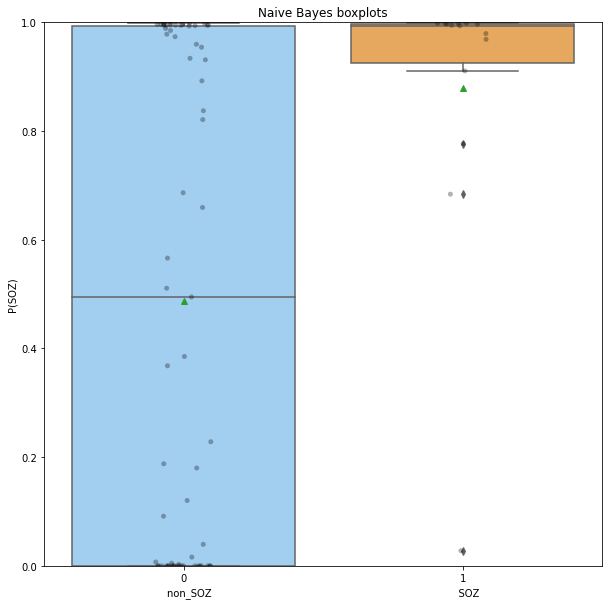

In [23]:
#Naive Bayes

gnb, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = naive_bayes(all_positive_patients, X_list, plot_roc, plot_pr)

# Printing Metrics
optimal_thresh = roc_thresholds[np.argmax(tpr - fpr)]
print("Optimal roc threshold: ", optimal_thresh)
y_rounded = np.where(y_pred > optimal_thresh, 1, 0)

tn, fp, fn, tp = confusion_matrix(y_test, y_rounded).ravel()

print("Accuracy: ", (tp + tn)/(tp + fp + tn + fn))
print("Sensitivity: ", tp / (tp + fn))
print("Specificity: ", tn / (tn + fp))


# Plotting boxplot
non_epilepsy = []
channels_non = []
epilepsy_normal = []
channels_normal = []

i = 0
while i < len(y_test):
    if list(y_test)[i] == 1.0:
        epilepsy_normal.append(y_pred[i])
        channels_normal.append(test_channels[i])
    elif list(y_test)[i] == 0.0:
        non_epilepsy.append(y_pred[i])
        channels_non.append(test_channels[i])
    i += 1
    
channels_normal = [x for _,x in sorted(zip(epilepsy_normal, channels_normal), reverse = True)]

pos_labels = []
for channel in channels_normal:
    channel = ''.join(i for i in channel if not i.isdigit()) #dropping digits from channel name
    channel_split = channel.split("_")
    for key in node_location.keys():
        if (channel_split[0] == key) | (channel_split[1] == key):
            pos_labels.append(node_location[key])

neg_labels = []
for channel in channels_non:
    channel = ''.join(i for i in channel if not i.isdigit()) #dropping digits from channel name
    channel_split = channel.split("_")
    for key in node_location.keys():
        if (channel_split[0] == key) | (channel_split[1] == key):
            neg_labels.append(node_location[key])

print("\n")
print("Positive labels")            
print(*pos_labels, sep = "\n")

print("\n")
print("Negative labels")
print(*neg_labels, sep = "\n")

    
plt.figure(figsize = (10, 10))
plt.title("Naive Bayes boxplots")
plt.xlabel("non_SOZ                                                                               SOZ")
plt.ylabel("P(SOZ)")
plt.ylim([0,1])

sns.boxplot(
    data=[non_epilepsy, epilepsy_normal],
    palette=[sns.xkcd_rgb["light blue"], sns.xkcd_rgb["light orange"]],
    showmeans=True,
)

sns.stripplot(
    color = 'black',
    alpha = 0.3, 
    data=[non_epilepsy, epilepsy_normal],
)


## Random Forest

Optimal roc threshold:  0.22
Accuracy:  0.7848101265822784
Sensitivity:  0.9285714285714286
Specificity:  0.7538461538461538


Positive labels
Left fronto-temporal grid
Left fronto-temporal grid
Left fronto-temporal grid
left anterior hippocampus
Right anterior temporal inferior
Right amygdala
left amygdala
right posterior hippocampus
Right amygdala depth
Basal temporal anterior
Right medial tumor inferior
Right anterior hippocampus
Left orbitofrontal depth
left amygdala


Negative labels
Left posterior nodule depth
Left amygdala
left posterior hippocampus
right posterior hippocampus
Left nodule E
Left lateral lesion 1
which patient?
Right piriform
Left anterior cingulate
Left posterior cortical dysplasia
Left lateral lesion 2
Left posterior cortical dysplasia
Basal temporal posterior-temporal
left posterior hippocampus
left anterior cortical dysplasia
Right orbitofrontal
Right anterior insular depth
Left orbitofrontal
Left posterior cortical dysplasia
left posterior hippocampus
Right 

<AxesSubplot:title={'center':'Random Forest boxplots'}, xlabel='non_SOZ                                                                               SOZ', ylabel='P(SOZ)'>

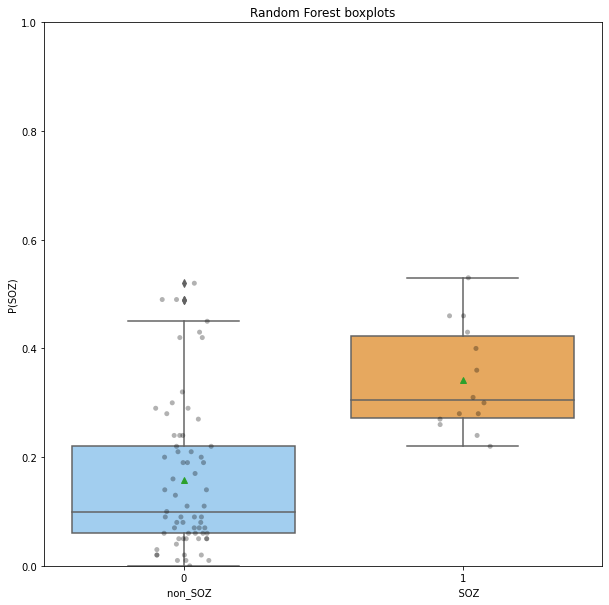

In [24]:
#Random Forest

max_depth = 20
rf, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr)

# Printing Metrics
optimal_thresh = roc_thresholds[np.argmax(tpr - fpr)]
print("Optimal roc threshold: ", optimal_thresh)
y_rounded = np.where(y_pred > optimal_thresh, 1, 0)

tn, fp, fn, tp = confusion_matrix(y_test, y_rounded).ravel()

print("Accuracy: ", (tp + tn)/(tp + fp + tn + fn))
print("Sensitivity: ", tp / (tp + fn))
print("Specificity: ", tn / (tn + fp))


# Plotting boxplot
non_epilepsy = []
channels_non = []
epilepsy_normal = []
channels_normal = []

i = 0
while i < len(y_test):
    if list(y_test)[i] == 1.0:
        epilepsy_normal.append(y_pred[i])
        channels_normal.append(test_channels[i])
    elif list(y_test)[i] == 0.0:
        non_epilepsy.append(y_pred[i])
        channels_non.append(test_channels[i])
    i += 1
    
channels_normal = [x for _,x in sorted(zip(epilepsy_normal, channels_normal), reverse = True)]

pos_labels = []
for channel in channels_normal:
    channel = ''.join(i for i in channel if not i.isdigit()) #dropping digits from channel name
    channel_split = channel.split("_")
    for key in node_location.keys():
        if (channel_split[0] == key) | (channel_split[1] == key):
            pos_labels.append(node_location[key])

neg_labels = []
for channel in channels_non:
    channel = ''.join(i for i in channel if not i.isdigit()) #dropping digits from channel name
    channel_split = channel.split("_")
    for key in node_location.keys():
        if (channel_split[0] == key) | (channel_split[1] == key):
            neg_labels.append(node_location[key])

print("\n")
print("Positive labels")            
print(*pos_labels, sep = "\n")

print("\n")
print("Negative labels")
print(*neg_labels, sep = "\n")

    
plt.figure(figsize = (10, 10))
plt.title("Random Forest boxplots")
plt.xlabel("non_SOZ                                                                               SOZ")
plt.ylabel("P(SOZ)")
plt.ylim([0,1])

sns.boxplot(
    data=[non_epilepsy, epilepsy_normal],
    palette=[sns.xkcd_rgb["light blue"], sns.xkcd_rgb["light orange"]],
    showmeans=True,
)

sns.stripplot(
    color = 'black',
    alpha = 0.3, 
    data=[non_epilepsy, epilepsy_normal],
)


## XGBoost

[21:35:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Optimal roc threshold:  0.11850349
Accuracy:  0.7468354430379747
Sensitivity:  0.7142857142857143
Specificity:  0.7538461538461538


Positive labels
Left fronto-temporal grid
Left fronto-temporal grid
Left fronto-temporal grid
left anterior hippocampus
Right anterior temporal inferior
Left orbitofrontal depth
Right anterior hippocampus
Right medial tumor inferior
right posterior hippocampus
Right amygdala
left amygdala
left amygdala
Right amygdala depth
Basal temporal anterior


Negative labels
Left posterior nodule depth
Left amygdala
left posterior hippocampus
right posterior hippocampus
Left nodule E
Left lateral lesion 1
which patient?
Right piriform
Left anterior cingulate
Left posterior cortical dysplasia
Left lateral lesion 2
Left 

/Users/shrey2/opt/anaconda3/envs/pcm/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


<AxesSubplot:title={'center':'XGBoost boxplots'}, xlabel='non_SOZ                                                                               SOZ', ylabel='P(SOZ)'>

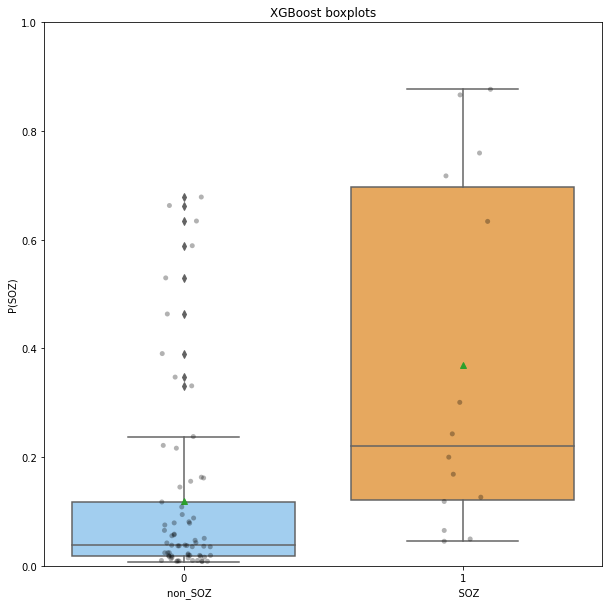

In [25]:
#XGBoost

learning_rate = 0.5
max_depth = 10
n_estimators = 10
xgb, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = xgboost(all_positive_patients, X_list, learning_rate, max_depth, n_estimators, plot_roc, plot_pr)

# Printing Metrics
optimal_thresh = roc_thresholds[np.argmax(tpr - fpr)]
print("Optimal roc threshold: ", optimal_thresh)
y_rounded = np.where(y_pred > optimal_thresh, 1, 0)

tn, fp, fn, tp = confusion_matrix(y_test, y_rounded).ravel()

print("Accuracy: ", (tp + tn)/(tp + fp + tn + fn))
print("Sensitivity: ", tp / (tp + fn))
print("Specificity: ", tn / (tn + fp))



# Plotting boxplot
non_epilepsy = []
channels_non = []
epilepsy_normal = []
channels_normal = []

i = 0
while i < len(y_test):
    if list(y_test)[i] == 1.0:
        epilepsy_normal.append(y_pred[i])
        channels_normal.append(test_channels[i])
    elif list(y_test)[i] == 0.0:
        non_epilepsy.append(y_pred[i])
        channels_non.append(test_channels[i])
    i += 1
    
channels_normal = [x for _,x in sorted(zip(epilepsy_normal, channels_normal), reverse = True)]

pos_labels = []
for channel in channels_normal:
    channel = ''.join(i for i in channel if not i.isdigit()) #dropping digits from channel name
    channel_split = channel.split("_")
    for key in node_location.keys():
        if (channel_split[0] == key) | (channel_split[1] == key):
            pos_labels.append(node_location[key])

neg_labels = []
for channel in channels_non:
    channel = ''.join(i for i in channel if not i.isdigit()) #dropping digits from channel name
    channel_split = channel.split("_")
    for key in node_location.keys():
        if (channel_split[0] == key) | (channel_split[1] == key):
            neg_labels.append(node_location[key])

print("\n")
print("Positive labels")            
print(*pos_labels, sep = "\n")

print("\n")
print("Negative labels")
print(*neg_labels, sep = "\n")

    
plt.figure(figsize = (10, 10))
plt.title("XGBoost boxplots")
plt.xlabel("non_SOZ                                                                               SOZ")
plt.ylabel("P(SOZ)")
plt.ylim([0,1])

sns.boxplot(
    data=[non_epilepsy, epilepsy_normal],
    palette=[sns.xkcd_rgb["light blue"], sns.xkcd_rgb["light orange"]],
    showmeans=True,
)

sns.stripplot(
    color = 'black',
    alpha = 0.3, 
    data=[non_epilepsy, epilepsy_normal],
)


## Adaboost

Optimal roc threshold:  0.4568432975948811
Accuracy:  0.7468354430379747
Sensitivity:  0.6428571428571429
Specificity:  0.7692307692307693


Positive labels
Right amygdala
Right anterior hippocampus
Left fronto-temporal grid
Left fronto-temporal grid
Left fronto-temporal grid
left anterior hippocampus
left amygdala
Left orbitofrontal depth
left amygdala
right posterior hippocampus
Right anterior temporal inferior
Right amygdala depth
Right medial tumor inferior
Basal temporal anterior


Negative labels
Left posterior nodule depth
Left amygdala
left posterior hippocampus
right posterior hippocampus
Left nodule E
Left lateral lesion 1
which patient?
Right piriform
Left anterior cingulate
Left posterior cortical dysplasia
Left lateral lesion 2
Left posterior cortical dysplasia
Basal temporal posterior-temporal
left posterior hippocampus
left anterior cortical dysplasia
Right orbitofrontal
Right anterior insular depth
Left orbitofrontal
Left posterior cortical dysplasia
left posterior hipp

<AxesSubplot:title={'center':'Adaboost boxplots'}, xlabel='non_SOZ                                                                               SOZ', ylabel='P(SOZ)'>

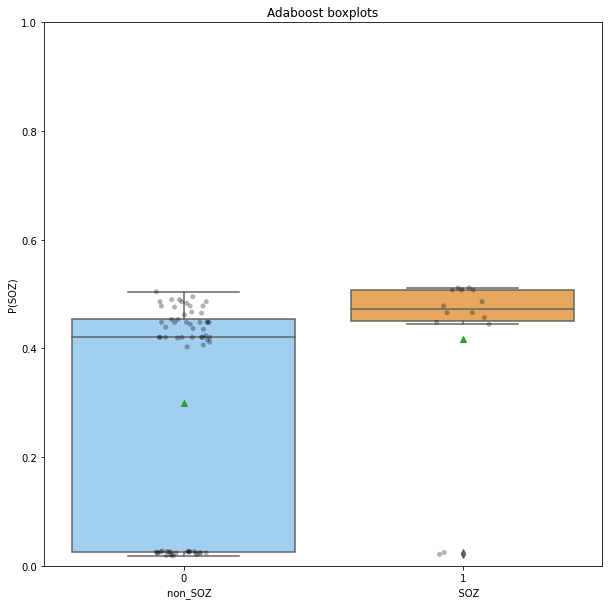

In [26]:
#Adaboost

n_estimators = 10
ada, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = adaboost(all_positive_patients, X_list, n_estimators, plot_roc, plot_pr)

# Printing Metrics
optimal_thresh = roc_thresholds[np.argmax(tpr - fpr)]
print("Optimal roc threshold: ", optimal_thresh)
y_rounded = np.where(y_pred > optimal_thresh, 1, 0)

tn, fp, fn, tp = confusion_matrix(y_test, y_rounded).ravel()

print("Accuracy: ", (tp + tn)/(tp + fp + tn + fn))
print("Sensitivity: ", tp / (tp + fn))
print("Specificity: ", tn / (tn + fp))


# Plotting boxplot
non_epilepsy = []
channels_non = []
epilepsy_normal = []
channels_normal = []

i = 0
while i < len(y_test):
    if list(y_test)[i] == 1.0:
        epilepsy_normal.append(y_pred[i])
        channels_normal.append(test_channels[i])
    elif list(y_test)[i] == 0.0:
        non_epilepsy.append(y_pred[i])
        channels_non.append(test_channels[i])
    i += 1
    
channels_normal = [x for _,x in sorted(zip(epilepsy_normal, channels_normal), reverse = True)]

pos_labels = []
for channel in channels_normal:
    channel = ''.join(i for i in channel if not i.isdigit()) #dropping digits from channel name
    channel_split = channel.split("_")
    for key in node_location.keys():
        if (channel_split[0] == key) | (channel_split[1] == key):
            pos_labels.append(node_location[key])

neg_labels = []
for channel in channels_non:
    channel = ''.join(i for i in channel if not i.isdigit()) #dropping digits from channel name
    channel_split = channel.split("_")
    for key in node_location.keys():
        if (channel_split[0] == key) | (channel_split[1] == key):
            neg_labels.append(node_location[key])

print("\n")
print("Positive labels")            
print(*pos_labels, sep = "\n")

print("\n")
print("Negative labels")
print(*neg_labels, sep = "\n")

    
plt.figure(figsize = (10, 10))
plt.title("Adaboost boxplots")
plt.xlabel("non_SOZ                                                                               SOZ")
plt.ylabel("P(SOZ)")
plt.ylim([0,1])

sns.boxplot(
    data=[non_epilepsy, epilepsy_normal],
    palette=[sns.xkcd_rgb["light blue"], sns.xkcd_rgb["light orange"]],
    showmeans=True,
)

sns.stripplot(
    color = 'black',
    alpha = 0.3, 
    data=[non_epilepsy, epilepsy_normal],
)


## SVM

Optimal roc threshold:  0.1832832530792182
Accuracy:  0.4177215189873418
Sensitivity:  0.9285714285714286
Specificity:  0.3076923076923077


Positive labels
left anterior hippocampus
Right anterior hippocampus
Left fronto-temporal grid
Right medial tumor inferior
Left orbitofrontal depth
Left fronto-temporal grid
Left fronto-temporal grid
right posterior hippocampus
Right amygdala depth
left amygdala
left amygdala
Right anterior temporal inferior
Right amygdala
Basal temporal anterior


Negative labels
Left posterior nodule depth
Left amygdala
left posterior hippocampus
right posterior hippocampus
Left nodule E
Left lateral lesion 1
which patient?
Right piriform
Left anterior cingulate
Left posterior cortical dysplasia
Left lateral lesion 2
Left posterior cortical dysplasia
Basal temporal posterior-temporal
left posterior hippocampus
left anterior cortical dysplasia
Right orbitofrontal
Right anterior insular depth
Left orbitofrontal
Left posterior cortical dysplasia
left posterior hipp

<AxesSubplot:title={'center':'SVM boxplots'}, xlabel='non_SOZ                                                                               SOZ', ylabel='P(SOZ)'>

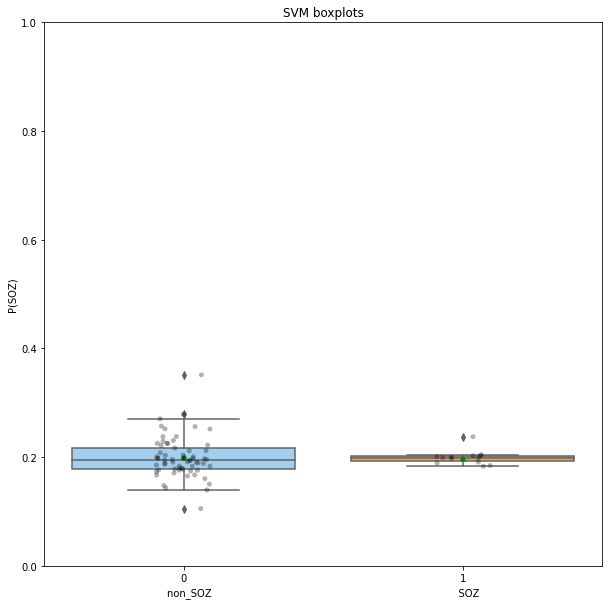

In [27]:
#SVM

C = 0.7
epsilon = 0.2
sv, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = svm(all_positive_patients, X_list, C, epsilon, plot_roc, plot_pr)

# Printing Metrics
optimal_thresh = roc_thresholds[np.argmax(tpr - fpr)]
print("Optimal roc threshold: ", optimal_thresh)
y_rounded = np.where(y_pred > optimal_thresh, 1, 0)

tn, fp, fn, tp = confusion_matrix(y_test, y_rounded).ravel()

print("Accuracy: ", (tp + tn)/(tp + fp + tn + fn))
print("Sensitivity: ", tp / (tp + fn))
print("Specificity: ", tn / (tn + fp))


# Plotting boxplot
non_epilepsy = []
channels_non = []
epilepsy_normal = []
channels_normal = []

i = 0
while i < len(y_test):
    if list(y_test)[i] == 1.0:
        epilepsy_normal.append(y_pred[i])
        channels_normal.append(test_channels[i])
    elif list(y_test)[i] == 0.0:
        non_epilepsy.append(y_pred[i])
        channels_non.append(test_channels[i])
    i += 1
    
channels_normal = [x for _,x in sorted(zip(epilepsy_normal, channels_normal), reverse = True)]

pos_labels = []
for channel in channels_normal:
    channel = ''.join(i for i in channel if not i.isdigit()) #dropping digits from channel name
    channel_split = channel.split("_")
    for key in node_location.keys():
        if (channel_split[0] == key) | (channel_split[1] == key):
            pos_labels.append(node_location[key])

neg_labels = []
for channel in channels_non:
    channel = ''.join(i for i in channel if not i.isdigit()) #dropping digits from channel name
    channel_split = channel.split("_")
    for key in node_location.keys():
        if (channel_split[0] == key) | (channel_split[1] == key):
            neg_labels.append(node_location[key])

print("\n")
print("Positive labels")            
print(*pos_labels, sep = "\n")

print("\n")
print("Negative labels")
print(*neg_labels, sep = "\n")

    
plt.figure(figsize = (10, 10))
plt.title("SVM boxplots")
plt.xlabel("non_SOZ                                                                               SOZ")
plt.ylabel("P(SOZ)")
plt.ylim([0,1])

sns.boxplot(
    data=[non_epilepsy, epilepsy_normal],
    palette=[sns.xkcd_rgb["light blue"], sns.xkcd_rgb["light orange"]],
    showmeans=True,
)

sns.stripplot(
    color = 'black',
    alpha = 0.3, 
    data=[non_epilepsy, epilepsy_normal],
)
